In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [2]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
x = np.random.uniform(0, 1, 50)
x = -np.sort(-x)
predict_glinear = list()
predict_gcubic = list()
predict_cs2 = list()
predict_cs6 = list()

In [20]:
for i in range(100):
    y = np.random.normal(0, 1, 50)
    
    # Global linear 
    coe_linear = np.polyfit(x, y, 1)
    linear = np.poly1d(coe_linear)
    predict_linear = linear(x)
    predict_glinear.append(predict_linear.tolist())
    
    # Global cubic
    coe_cubic = np.polyfit(x, y, 3)
    cubic = np.poly1d(coe_cubic)
    predict_cubic = cubic(x)
    predict_gcubic.append(predict_cubic.tolist())
    
    # Cubic spline 2 knots
    transformed_x = dmatrix("bs(x, knots=(0.33, 0.66), degree=3, include_intercept=False)")
    fit1 = sm.GLM(y, transformed_x).fit()
    predict_cs = fit1.predict(dmatrix("bs(x, knots=(0.33, 0.66), degree=3, include_intercept=False)"))
    predict_cs2.append(predict_cs)
    
    #Natural cubic spline
    transformed_x = dmatrix("cr(x, df = 6, lower_bound = 0.1, upper_bound = 0.9, knots = (0.26, 0.42, 0.58, 0.74))")
    fit1 = sm.GLM(y, transformed_x).fit()
    predict_ncs = fit1.predict(dmatrix("cr(x, df = 6, lower_bound = 0.1, upper_bound = 0.9, knots = ( 0.26, 0.42, 0.58, 0.74))"))
    predict_cs6.append(predict_ncs)
    

In [21]:
var_glieanr = np.var(predict_glinear,0)
var_gcubic = np.var(predict_gcubic,0)
var_cs2 = np.var(predict_cs2,0)
var_cs6 = np.var(predict_cs6,0)

Text(0,0.5,'Pointwise Variance')

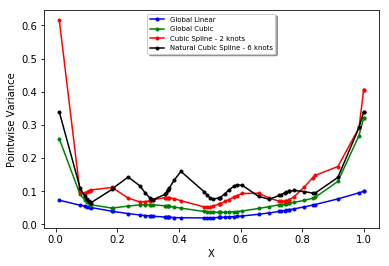

In [22]:
fig, ax = pl.subplots()
ax.plot(x,var_glieanr,'b.-', label = 'Global Linear')
ax.plot(x,var_gcubic,'g.-', label = 'Global Cubic')
ax.plot(x,var_cs2,'r.-', label = 'Cubic Spline - 2 knots')
ax.plot(x,var_cs6,'k.-', label = 'Natural Cubic Spline - 6 knots')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-small')
pl.xlabel('X')
pl.ylabel('Pointwise Variance')

In [20]:
from sklearn import tree
from sklearn import cross_validation
from random import randrange

In [95]:
x = np.random.choice([0, 1], size=(100,))
y = np.random.choice([0, 1], size=(100,))
dataset = np.column_stack((x,y))

In [96]:
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    size = int(len(dataset)/n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) <  size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [106]:
def evaluate_cv(dataset, n_folds):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set,[])

        actual = [row[-1] for row in fold]
        tree_model = tree.DecisionTreeClassifier(max_depth=1)
        
        train_x = [[row[0]] for row in train_set]
        train_y = [[row[-1]] for row in train_set]
        
        model = tree_model.fit(train_x,train_y)
        test_x = [[row[0]] for row in fold]
        prediction = model.predict(test_x)
        error = sum(abs(prediction - actual))/float(20)
    scores.append(error)
    return scores

In [108]:
evaluate_cv(dataset.tolist(), 5)

[0.5]